In this notebook we check the geometry and the confinment of the particles generated. 

In [2]:
%run 'init.ipynb'
%matplotlib inline

Welcome to JupyROOT 6.14/04


In [3]:
#few imports 
import pandas as pd
import numpy as np
from pandas import HDFStore
from pandas import read_hdf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ROOT
import root_numpy
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
import uproot
from matplotlib.patches import Rectangle

In [4]:
materials = [
    "SS_OuterCryostat",
    "SS_InnerCryostat",
    "OuterCryostatReflector",
    "SS_BellPlate",
    "SS_BellSideWall",
    "PmtTpc",
    "Copper_TopRing",
    "Copper_LowerRing",
    "Teflon_Pillar_",
    "Copper_FieldGuard_",
    "Copper_FieldShaperRing_",
    "SS_GateRing",
    "SS_AnodeRing",
    "SS_TopMeshRing",
    "SS_CathodeRing",
    "SS_BottomMeshRing",
    "Teflon_BottomTPC",
    "Teflon_TPC",
    ]

material  = materials[10]

In [5]:
#oper with UpRoot --- check out the reiteration among files 

rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
print(rootfile)
def get_xyz(rootfile):
    file = uproot.open(rootfile)
    tree = file["events/events"]
    xp = tree["xp_pri"].array()
    df = tree.pandas.df([ "xp_pri", "yp_pri", "zp_pri"])
    df.columns = ['X', 'Y', 'Z_uc'] #rename 
    #Add some variables
    df['R'] = np.sqrt(df.X*df.X+ df.Y*df.Y)
    df['R2'] = df.R*df.R
    offset = 1488/2
    df['Z'] = df.Z_uc+ offset 
    return df
data = get_xyz(rootfile)
data.head()

/userdata/arocchetti/XENONnT_2019-10-16/Copper_FieldShaperRing_/geantinos/output_Copper_FieldShaperRing__geantinos_1.root


,X,Y,Z_uc,R,R2,Z
entry,,,,,,
0,-598.603821,-297.171478,-1150.276001,668.309387,446637.43750,-406.276001
1,458.333496,485.215302,-716.794495,667.460510,445503.53125,27.205505
2,601.905457,-290.778992,-1464.179688,668.462891,446842.62500,-720.179688
3,-582.338440,327.332153,-413.494965,668.030273,446264.43750,330.505035
4,-455.029236,489.249359,-305.249207,668.144104,446416.53125,438.750793


In [ ]:
# material = [
#     "SS_OuterCryostat",]
# rootfile = '/sc/userdata/arocchetti/XENONnT_2019-10-28/SS_OuterCryostat/U238Pb206/output_SS_OuterCryostat_U238Pb206_1.root'
# print(rootfile)
# data = get_xyz(rootfile)
# data.head()

In [ ]:
##read the root file and get the branches you need 
# rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/Teflon_Pillar_/geantinos/output_Teflon_Pillar__geantinos_1.root'

# def get_position(rootfile):
#     f = ROOT.TFile(rootfile)
#     tree = f.Get('events/events')
#     out=root_numpy.tree2array(tree)
#     X = np.array([out['xp_pri'][i] for i in range(len(out['xp_pri']))])
#     Y = np.array([out['yp_pri'][i] for i in range(len(out['yp_pri']))])
#     Z_uc = np.array([out['zp_pri'][i] for i in range(len(out['zp_pri']))]) #z not centered
#     Etot = np.array(out['etot'])
#     f.Close()
#     X,Y, Z_uc, Etot = get_position(rootfile)
#     return  X,Y, Z_uc


In [ ]:
#call the function and transform it into a dataframe ---SLOW----
#X,Y, Z_uc, Etot = get_position(rootfile)
#data = pd.DataFrame({'X': X, 'Y': Y, 'Z_uc': Z_uc, 'Etot': Etot})

In [6]:
plt.figure(figsize=(5,5))

def print_volume(data):
    plt.hist2d(data.R, data.Z, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
    norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.show()

def print_xy(data):
    plt.hist2d(data.X, data.Y, bins = (300,300), range = ((-950, 950), (-950, 950)), 
    norm = LogNorm())
    plt.ylabel('x [mm]')
    plt.xlabel('y [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.show()
    
def scatter(data):
    import matplotlib.lines as mlines
    plt.scatter(data.R, data.Z, marker = '.', s=2,label=material )
    c=1
    plt.xlim(-100,1200)
    plt.ylim(-1500, 1700)
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.tight_layout()
    plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-large')
#scatter(data)

<Figure size 360x360 with 0 Axes>

In [ ]:
#  if material == 'SS_Innercryostat':
#         rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#         data = get_xyz(rootfile)
#         flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
#         print_volume(flange1_in)
#         print_volume(flange2_in)
#         print_volume(flange3_in)
#         print_volume(shell_in)
#         print_volume(elongation_in)
        
#         else: 
#         rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#         data = get_xyz(rootfile)
#         print_volume(data)
    

In [ ]:
# for material in materials:
#     rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#     data = get_xyz(rootfile)
#     if material == 'SS_OuterCryostat':
#         flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
#         print_xy(flange1)
#         print_xy(flange2)
#         print_xy(flange3)
#         print_xy(shell)
#         print_xy(elongation)
#     else:    
#         print_xy(data)

In [ ]:
# plt.figure(figsize=(10,10))
# for material in materials:
#     rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#     data = get_xyz(rootfile)
#     scatter(data)
    #plt.show()

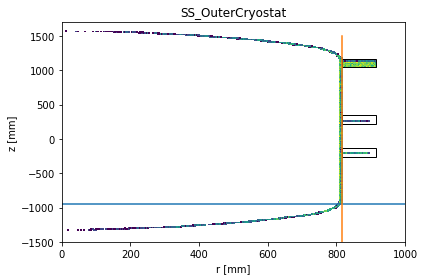

In [7]:
#let's divide the cryostat
material = "SS_OuterCryostat"
rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
data = get_xyz(rootfile)
plt.hist2d(data.R, data.Z, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
    norm = LogNorm())
plt.ylabel('z [mm]')
plt.xlabel('r [mm]')
plt.title(material)
plt.tight_layout()
plt.title(material)
   
currentAxis = plt.gca()
offset = 1488/2
#STIFFENING RINGS OUTCYRO
currentAxis.add_patch(Rectangle((815, 300+offset), 100, 120,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((815, -520+offset), 100, 120,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((815, -1000+offset), 100, 120,alpha=1, fill=None ))

plt.plot([0,1000],[-950, -950])
plt.plot([815, 815],[-1500, 1500])
plt.show()
#let's keep it here if we change sim, but if we do inner/outercryo sep not needed 
#points = ((0,732), (800,500), (-2080,-1796), (0,732))

#plt.plot([0,742],[800+offset,500+offset])
#plt.plot([0,742],[-2080+offset,-1796+offset])
#plt.plot([742,742],[500+offset,-1796+offset])

mass_flange1: 380.47384399999993
mass_flange2: 15.587187999999998
mass_flange3: 17.156368
mass shell: 529.85978
mass elongation: 103.04281999999998
1046.12
10000


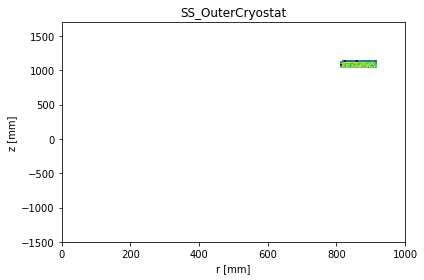

In [14]:
#let's write a function to divide the cryo
rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/SS_OuterCryostat'+ '/geantinos/output_'+ material+'_geantinos_1.root'
data = get_xyz(rootfile)
def divide_outercryo(data):
    flange1 = data[(data.R>815) & (data.Z > 300+offset)]
    flange2 = data[(data.R>815) & (data.Z < 300+offset) & (data.Z > -520 + offset)] 
    flange3 = data[(data.R>815) & (data.Z < -520+offset) & (data.Z > -1000 + offset)]
    shell = data[(data.R<815) & (data.Z > -950)]
    elongation = data[(data.R<815) & (data.Z < -950)]
    mass_tot = 1046.12 #kg
    geant_tot = len(data)
    mass_flange1 = (mass_tot * len(flange1)) / geant_tot
    print("mass_flange1:", mass_flange1)
    mass_flange2 = (mass_tot * len(flange2))/ geant_tot
    print("mass_flange2:",mass_flange2)
    mass_flange3 = (mass_tot *  len(flange3))/ geant_tot
    print("mass_flange3:",mass_flange3)
    mass_shell = (mass_tot *len(shell))/ geant_tot
    print("mass shell:",mass_shell)
    mass_elong = (mass_tot * len(elongation))/ geant_tot
    print("mass elongation:",mass_elong)
    print(mass_flange1+mass_flange2+mass_flange3+mass_shell+mass_elong)      
    return flange1, flange2, flange3, shell, elongation
    

flange1, flange2, flange3, shell, elongation = divide_outercryo(data)

print(len(data))
print_volume(flange1)

In [18]:
2108.2485565026122 + 51461.07382550336


53569.32238200597

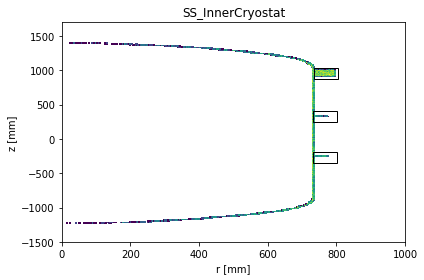

In [8]:
#let's divide the cryostat
material = "SS_InnerCryostat"
rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
data = get_xyz(rootfile)
plt.hist2d(data.R, data.Z, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
    norm = LogNorm())
plt.ylabel('z [mm]')
plt.xlabel('r [mm]')
plt.title(material)
plt.tight_layout()
plt.title(material)
currentAxis = plt.gca()
offset = 1488/2
#STIFFENING RINGS INNERCRYO
currentAxis.add_patch(Rectangle((735, 125+offset), 70, 160,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((732, -500+offset), 70, 160,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((732, -1100+offset), 70, 160,alpha=1, fill=None ))

/userdata/arocchetti/XENONnT_2019-10-16/SS_InnerCryostat/geantinos/output_SS_InnerCryostat_geantinos_1.root
mass_flange1_in: 212.08858199999997
mass_flange2_in: 7.514345999999999
mass_flange3_in: 7.897730999999999
mass shell_in: 452.47097699999995
mass elongation: 86.798364
766.7699999999999


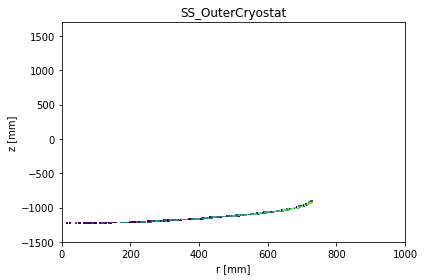

In [40]:

rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/SS_InnerCryostat/geantinos/output_SS_InnerCryostat_geantinos_1.root'
data = get_xyz(rootfile)
print(rootfile)

def divide_innercryo(data):
    flange1_in = data[(data.R>735) & (data.Z > 125+offset)]
    flange2_in = data[(data.R>735) & (data.Z < 125+offset) & (data.Z > -500 + offset)] 
    flange3_in = data[(data.R>735) & (data.Z < -500+offset) & (data.Z > -1000 + offset)]
    shell_in = data[(data.R<735) & (data.Z > -910)]
    elongation_in = data[(data.R<735) & (data.Z < -910)]
    mass_tot =766.77
    geant_tot = len(data)
    
    mass_flange1_in = (mass_tot * len(flange1_in)) / geant_tot
    print("mass_flange1_in:", mass_flange1_in)
    mass_flange2_in = (mass_tot * len(flange2_in))/ geant_tot
    print("mass_flange2_in:",mass_flange2_in)
    mass_flange3_in = (mass_tot *  len(flange3_in))/ geant_tot
    print("mass_flange3_in:",mass_flange3_in)
    mass_shell_in = (mass_tot *len(shell_in))/ geant_tot
    print("mass shell_in:",mass_shell_in)
    mass_elong_in = (mass_tot * len(elongation_in))/ geant_tot
    print("mass elongation:",mass_elong_in)
    print(mass_flange1_in + mass_flange2_in + mass_flange3_in + mass_shell_in + mass_elong_in)   
    
    
    
    return flange1_in, flange2_in, flange3_in, shell_in, elongation_in

flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
print_volume(elongation_in)
plt.show()

mass_bottomLip: 6223.86573


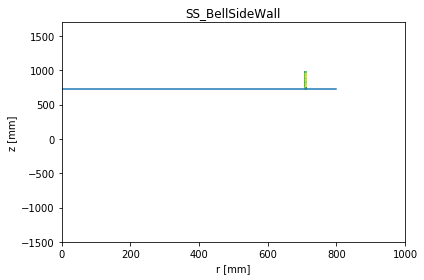

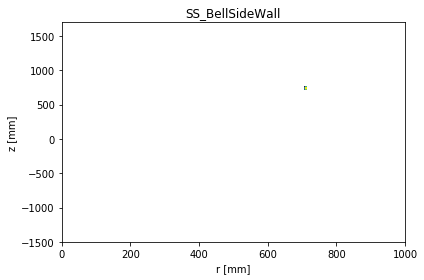

1866


In [43]:
#inspect bell 
material = "SS_BellSideWall"
rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
data = get_xyz(rootfile)
plt.hist2d(data.R, data.Z, bins = (300,300), range = ((600, 800), (500, 1200)), 
    norm = LogNorm())
plt.ylabel('z [mm]')
plt.xlabel('r [mm]')
plt.title(material)
plt.tight_layout()
plt.title(material)
plt.plot([0, 800],[719.29+5,719.29+5])
#plt.show()

def divide_bellWall(data):
    rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
    bottomLip = data[data.Z < (719.29 + 50)]
    bellWall = data[data.Z > (719.29 + 50)]
    mass_bw =33354.05
    geant_bw = len(data)
    
    mass_bottomLip = (mass_bw * len( bottomLip)) / geant_bw
   
    print("mass_bottomLip:", mass_bottomLip)
    return bottomLip, bellWall

bottomLip, bellWall = divide_bellWall(data)
print_volume(bellWall)
print_volume(bottomLip)
print(len(bottomLip))

In [14]:
for material in materials:
    
    if material == 'SS_OuterCryostat':
        rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        print_volume(flange1)
        print_volume(flange2)
        print_volume(flange3)
        print_volume(shell)
        print_volume(elongation)
    
    elif material == 'SS_InnerCryostat':
        rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        print_volume(flange1_in)
        print_volume(flange2_in)
        print_volume(flange3_in)
        print_volume(shell_in)
        print_volume(elongation_in)
        
    elif material == 'SS_BellSideWall':
        rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
        data = get_xyz(rootfile)
        bottomLip, bellWall = divide_bellWall(data)
        print_volume(bottomLip)
        print_volume(bellWall)
        
    else: 
        rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
        data = get_xyz(rootfile)
        print_volume(data)
    

mass_flange1: 2108.2485565026122
mass_flange2: 51461.07382550336
mass_flange3: 46754.26829268293
mass shell: 1513.8598223099705


NameError: name 'mass_elongation' is not defined